# Sesión 1: Redes Neuronales Densas para Clasificación de Imágenes

**Objetivo de la sesión:**
En esta primera sesión, construiremos una red neuronal básica (compuesta solo por capas densas) para clasificar imágenes. Usaremos el conjunto de datos CIFAR-10. El objetivo principal no es alcanzar una precisión perfecta, sino entender las **limitaciones inherentes** de este enfoque para tareas de visión por computadora, lo que nos dará la motivación perfecta para introducir las Redes Neuronales Convolucionales (CNNs) en la siguiente sesión.

### 1. Importación de Librerías

Primero, importamos todas las librerías que necesitaremos: `TensorFlow` y `Keras` para construir y entrenar el modelo, `NumPy` para operaciones numéricas y `Matplotlib` para visualizar nuestros datos y resultados.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

### 2. Carga y Preparación del Conjunto de Datos (CIFAR-10)

Vamos a utilizar CIFAR-10, un conjunto de datos muy popular que consta de 60,000 imágenes a color de 32x32 píxeles, divididas en 10 clases.

In [2]:
# Cargamos el dataset CIFAR-10 que ya viene pre-cargado en Keras
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Definimos los nombres de las clases para una fácil visualización posterior
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Imprimimos las dimensiones de los datos para entender su estructura
print("\n--- Dimensiones de los Datos ---")
print("Forma de los datos de entrenamiento (imágenes):", x_train.shape)
print("Forma de las etiquetas de entrenamiento:", y_train.shape)
print("Forma de los datos de prueba (imágenes):", x_test.shape)
print("Forma de las etiquetas de prueba:", y_test.shape)


--- Dimensiones de los Datos ---
Forma de los datos de entrenamiento (imágenes): (50000, 32, 32, 3)
Forma de las etiquetas de entrenamiento: (50000, 1)
Forma de los datos de prueba (imágenes): (10000, 32, 32, 3)
Forma de las etiquetas de prueba: (10000, 1)


### 3. Visualización de los Datos

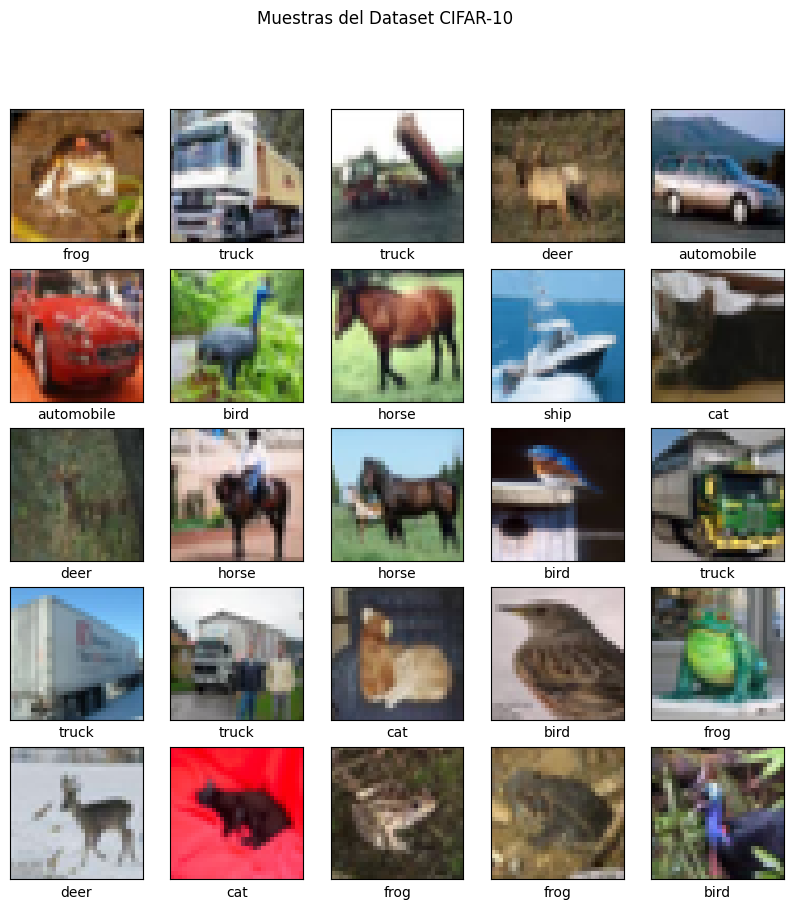

In [3]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.suptitle("Muestras del Dataset CIFAR-10")
plt.show()

### 4. Preprocesamiento de los Datos

In [4]:
print("\n--- Preprocesando los Datos ---")
x_train_norm = x_train.astype('float32') / 255.0
x_test_norm = x_test.astype('float32') / 255.0

num_classes = 10
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)

print("Ejemplo de etiqueta original:", y_train[0][0])
print("Ejemplo de etiqueta en formato One-Hot:", y_train_cat[0])


--- Preprocesando los Datos ---
Ejemplo de etiqueta original: 6
Ejemplo de etiqueta en formato One-Hot: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


### 5. Experimento 1: Arquitectura Densa Ancha

Ahora construiremos nuestro primer modelo. La primera capa, `Flatten`, es la clave de las limitaciones de este modelo, ya que **destruye la información espacial** de la imagen al aplanarla en un único vector.

In [ ]:
print("\n--- Construyendo el Modelo 1 ---")
model_1 = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model_1.summary()

### 6. Compilación y Entrenamiento (Modelo 1)

In [ ]:
print("\n--- Compilando y Entrenando el Modelo 1 ---")
model_1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_1 = model_1.fit(x_train_norm, y_train_cat,
                      epochs=100,
                      batch_size=64,
                      validation_data=(x_test_norm, y_test_cat))

### 7. Evaluación de Resultados (Modelo 1)

In [ ]:
print("\n--- Evaluando los Resultados del Modelo 1 ---")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_1.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history_1.history['val_accuracy'], label='Precisión de Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Curva de Precisión (Modelo 1)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_1.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history_1.history['val_loss'], label='Pérdida de Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Curva de Pérdida (Modelo 1)')
plt.legend()
plt.grid(True)

plt.suptitle("Resultados del Entrenamiento del Modelo Denso 1")
plt.show()

### 8. Experimento 2: Arquitectura Alternativa (Más Profunda y Estrecha)

Para confirmar que el problema no es la arquitectura específica que elegimos, sino el enfoque general, probaremos un modelo diferente. Este será más profundo (más capas) pero más estrecho (menos neuronas por capa). ¿Mejorará el resultado de forma significativa?

In [ ]:
print("\n--- Construyendo el Modelo 2 (Profundo y Estrecho) ---")
model_2 = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model_2.summary()

### 9. Compilación y Entrenamiento (Modelo 2)

In [ ]:
print("\n--- Compilando y Entrenando el Modelo 2 ---")
model_2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history_2 = model_2.fit(x_train_norm, y_train_cat,
                        epochs=100,
                        batch_size=64,
                        validation_data=(x_test_norm, y_test_cat))

### 10. Evaluación de Resultados (Modelo 2)

In [ ]:
print("\n--- Evaluando los Resultados del Modelo 2 ---")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history_2.history['val_accuracy'], label='Precisión de Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Curva de Precisión (Modelo 2)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history_2.history['val_loss'], label='Pérdida de Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Curva de Pérdida (Modelo 2)')
plt.legend()
plt.grid(True)

plt.suptitle("Resultados del Entrenamiento del Modelo Denso 2")
plt.show()

## Experimento 3: Sesión de la clase

In [5]:
print("\n--- Construyendo el Modelo 2 (Profundo y Estrecho) ---")
model_3 = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128, activation='relu'),
    Dense(64, activation='tanh'),
    Dense(32, activation='elu'),
    Dense(16, activation='relu'),
    Dense(num_classes, activation='tanh')
])

model_3.summary()


--- Construyendo el Modelo 2 (Profundo y Estrecho) ---


C:\Users\legion\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 404,378 (1.54 MB)

 Trainable params: 404,378 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
print("\n--- Compilando y Entrenando el Modelo 2 ---")
model_3.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history_3 = model_3.fit(x_train_norm, y_train_cat,
                        epochs=20,
                        batch_size=64,
                        validation_data=(x_test_norm, y_test_cat))


--- Compilando y Entrenando el Modelo 2 ---
Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.0997 - loss: 7.9579 - val_accuracy: 0.1000 - val_loss: 8.0590
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0995 - loss: 8.0819 - val_accuracy: 0.1000 - val_loss: 8.0590
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.0996 - loss: 8.0777 - val_accuracy: 0.1000 - val_loss: 8.0590
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0989 - loss: 8.1035 - val_accuracy: 0.1000 - val_loss: 8.0590
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1008 - loss: 8.0914 - val_accuracy: 0.1000 - val_loss: 8.0590
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1005 - loss: 8.1215 - val_accuracy: 0.1000 - val_loss: 8.0590
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0998 - loss: 8.0869 - val_accuracy: 0.1000 - val_loss: 8.0590
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accur


--- Evaluando los Resultados del Modelo 3 ---


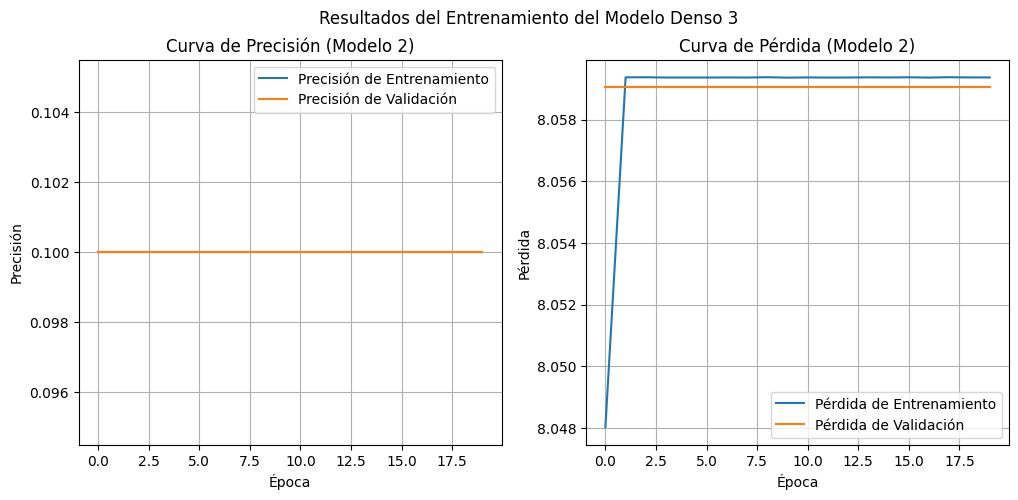

In [7]:
print("\n--- Evaluando los Resultados del Modelo 3 ---")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_3.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history_3.history['val_accuracy'], label='Precisión de Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Curva de Precisión (Modelo 2)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_3.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history_3.history['val_loss'], label='Pérdida de Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Curva de Pérdida (Modelo 2)')
plt.legend()
plt.grid(True)

plt.suptitle("Resultados del Entrenamiento del Modelo Denso 3")
plt.show()

### Conclusiones

Hemos entrenado dos arquitecturas de redes neuronales densas muy diferentes:
1.  **Modelo 1:** Ancho y menos profundo (512 -> 256 neuronas).
2.  **Modelo 2:** Estrecho y más profundo (256 -> 128 -> 64 neuronas).

A pesar de los cambios, los resultados son consistentemente mediocres (precisión de validación < 50%) y ambos modelos sufren de un claro sobreajuste. Esto demuestra de forma contundente que el problema no es una mala elección de hiperparámetros, sino una **falla fundamental del enfoque**.

Las redes densas, al usar la capa `Flatten`, son incapaces de procesar la **información espacial** de las imágenes. Para ellas, una imagen no es más que una larga lista de números sin estructura.

**Esta conclusión es el puente perfecto**, donde introduciremos las **Redes Neuronales Convolucionales (CNNs)**, un tipo de arquitectura diseñada específicamente para superar estas limitaciones y entender las imágenes de una manera mucho más efectiva.